In [1]:
import matplotlib.pylab as plt
import numpy as np
from astropy import units as u
from astropy.io import fits
import aplpy
import matplotlib.patheffects as pe
from astropy.wcs import WCS
import colorcet as cc
import cmocean
import cmasher
import PIL # for saving images as TIF

%matplotlib inline
%load_ext autoreload
%autoreload 2

# set so that these display properly on black backgrounds
plt.rcParams['figure.facecolor']='w'

In [2]:
def fix_aplpy_fits(aplpy_obj, dropaxis=2):
    """This removes the degenerated dimensions in APLpy 2.X...
    The input must be the object returned by aplpy.FITSFigure().
    `dropaxis` is the index where to start dropping the axis (by default it assumes the 3rd,4th place).
    """
    temp_wcs = aplpy_obj._wcs.dropaxis(dropaxis)
    temp_wcs = temp_wcs.dropaxis(dropaxis)
    aplpy_obj._wcs = temp_wcs

In [3]:
def Fig1( fig, fontcolor='black', 
         show_contour=True, contour_data=[], contour_levs='',
         plot_xlabel=True, plot_ylabel=False, 
         plot_cbar=False, cbar_label='(Jy beam$^{-1}$)',
         plot_label=True, label=' ', label_coord=[0.67,0.9],
         plot_beam=True, plot_grid=False, recenter_data=True):
    
    fig.set_nan_color('0.95')
    
    if plot_beam:
        fig.add_beam()
        fig.beam.set(facecolor='white', edgecolor='black', hatch='////////')
        
    fig.axis_labels.set_font(size=6)
    fig.axis_labels.set_xtext('RA')
    fig.tick_labels.set_yformat('d.ddd')
    fig.axis_labels.set_ytext('DEC')
    fig.tick_labels.set_xformat('d.ddd')
    fig.axis_labels.set_ypad(pad=-1.5)
    
    fig.ticks.set_color('white')
    fig.ticks.set_tick_direction('in')
    fig.tick_labels.set_font(size=6)
    #fig.ticks.set_minor_frequency(2)
    fig.ticks.set_yspacing(0.002)  # degrees
    fig.ticks.set_xspacing(0.01)  # degrees
    
    if not plot_xlabel:
        fig.axis_labels.hide_x()
        fig.tick_labels.hide_x()
        
    if not plot_ylabel:
        fig.axis_labels.hide_y()
        fig.tick_labels.hide_y()
        
    if plot_cbar:
        fig.add_colorbar()
        fig.colorbar.set_location('top')
        fig.colorbar.set_width(0.05)
        fig.colorbar.set_pad(0.5)
        fig.colorbar.set_axis_label_text(cbar_label)
        
    if show_contour:
        c_levs = contour_levs
        fig.show_contour(contour_data, colors='white', linewidths=1.5, levels=c_levs)
        fig.show_contour(contour_data, colors='black', linewidths=0.75, levels=c_levs)
    
    if plot_label:
        fig.add_label(label_coord[0], label_coord[1], label, relative=True, color=fontcolor, size=6)
        
    if plot_grid:
        fig.add_grid()
        fig.grid.set_color('white')
        fig.grid.set_alpha(0.1)
        fig.grid.set_linestyle(':')  
        
    if recenter_data:
        # got the coordinates of the center from CASAviewer
        fig.recenter(347.432, 67.3942, radius=0.008)# width=0.008, height=0.008)  
    

## Pan-STARRS RGB plot

In [4]:
### continuum
cont_original = fits.open('/Users/kristina/Hamburgers/Draculas_Chivito/SMA/data/DraChi.CONT.fits')
cont = fits.open('/Users/kristina/Hamburgers/Draculas_Chivito/SMA/data/DraChi.CONT_modified_header.fits')

## delete header keywords of the third and fourth dimension
cont[0].header['NAXIS'] = 2
del cont[0].header['NAXIS3']
del cont[0].header['NAXIS4']
del cont[0].header['CTYPE3']
del cont[0].header['CRVAL3']
del cont[0].header['CDELT3']
del cont[0].header['CRPIX3']
del cont[0].header['CUNIT3']
del cont[0].header['CTYPE4']
del cont[0].header['CRVAL4']
del cont[0].header['CDELT4']
del cont[0].header['CRPIX4']
del cont[0].header['CUNIT4']  
del cont[0].header['PC3_1']  
del cont[0].header['PC4_1']  
del cont[0].header['PC3_2']  
del cont[0].header['PC4_2']  
del cont[0].header['PC3_3']  
del cont[0].header['PC4_3']  
del cont[0].header['PC3_4']  
del cont[0].header['PC4_4']  
del cont[0].header['PC1_3']  
del cont[0].header['PC1_4']  
del cont[0].header['PC2_3']  
del cont[0].header['PC2_4']  

#cont[0].header


In [5]:
mom0_12CO = fits.open('/Users/kristina/Hamburgers/Draculas_Chivito/SMA/data/DraChi.briggs0.12CO.velcor.fixVel.lsrk.im.image_M0.fits')
mom0_13CO = fits.open('/Users/kristina/Hamburgers/Draculas_Chivito/SMA/data/DraChi.briggs0.13CO.velcor.fixVel.lsrk.im.image_M0.fits')
mom0_C18O = fits.open('/Users/kristina/Hamburgers/Draculas_Chivito/SMA/data/DraChi.briggs0.C18O.velcor.fixVel.lsrk.im.image_M0.fits')

INFO: Red: [aplpy.rgb]
INFO: vmin =  0.000e+00 [aplpy.rgb]
INFO: vmax =  1.000e+05 [aplpy.rgb]
INFO: Green: [aplpy.rgb]
INFO: vmin =  0.000e+00 [aplpy.rgb]
INFO: vmax =  1.000e+05 [aplpy.rgb]
INFO: Blue: [aplpy.rgb]
INFO: vmin =  0.000e+00 [aplpy.rgb]
INFO: vmax =  1.000e+05 [aplpy.rgb]


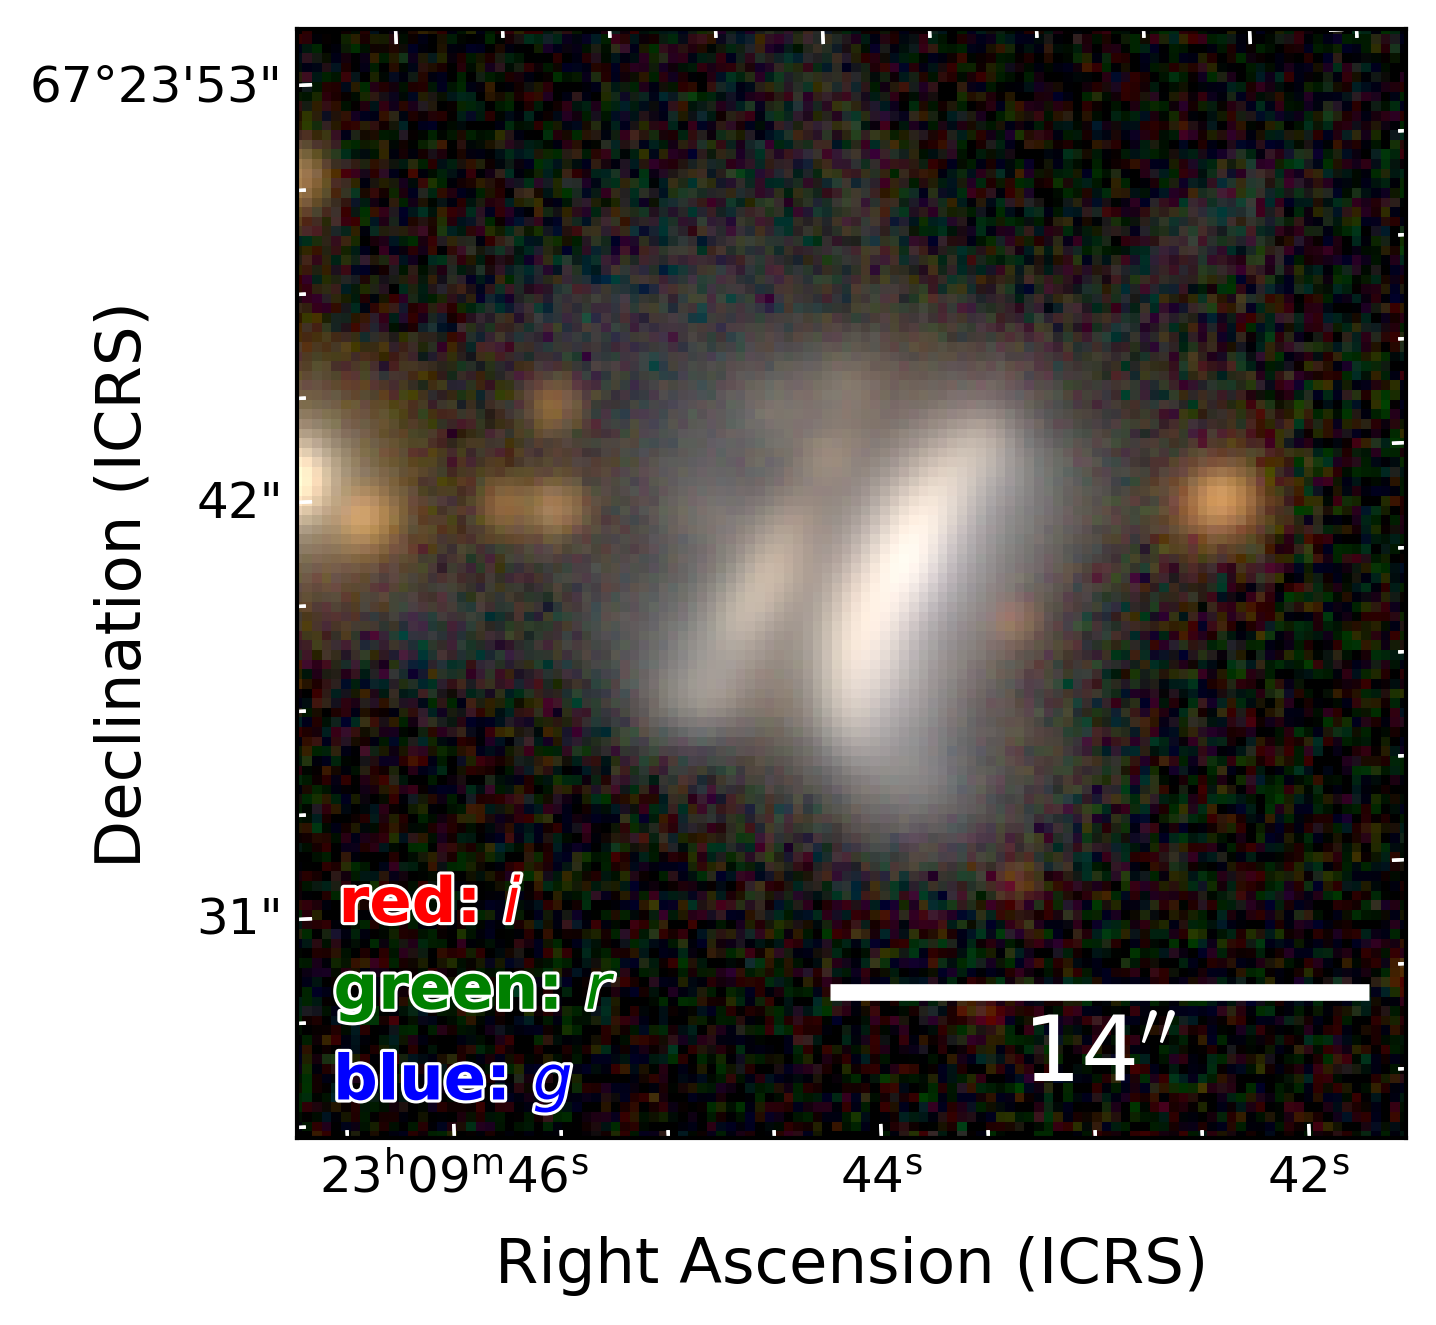

In [6]:
fig = plt.figure(dpi=300)


aplpy.make_rgb_image('DraChi_RGB_cube.fits','DraChi_rgb.png',
                     stretch_r='log', stretch_g='log', stretch_b='log',
                     vmin_r=0., vmin_g=0., vmin_b=0.,
                     vmax_r=1e5, vmax_g=1e5, vmax_b=1e5)

f = aplpy.FITSFigure('DraChi_rgb.png', figure=fig, north=True, convention='orthographic/synthesis')
f.show_rgb()

f.axis_labels.set_font(size=15)
f.axis_labels.set_xtext('Right Ascension (ICRS)')
f.axis_labels.set_ytext('Declination (ICRS)')
f.axis_labels.set_ypad(pad=-1.5)


f.tick_labels.set_font(size=12)
#f.tick_labels.set_xformat('d.dd')
#f.tick_labels.set_yformat('d.ddd')

ang_sep = (14*u.arcsec).to(u.rad)
f.add_scalebar(ang_sep)
f.scalebar.set_label("$14''$")
f.scalebar.set_font(size=22)
f.scalebar.set_linewidth(4)
f.scalebar.set_color('white')

f.ticks.set_color('white')
f.ticks.set_tick_direction('in')
f.ticks.set_minor_frequency(4)
f.ticks.set_xspacing(0.008)  # degrees
f.ticks.set_yspacing(0.003)  # degrees

f.add_label(0.12,0.21, 'red: $i$', relative=True, color='red', size=15, weight='semibold', path_effects=[pe.withStroke(linewidth=1.5, foreground="white")])
f.add_label(0.16,0.13, 'green: $r$', relative=True, color='green', size=15, weight='semibold', path_effects=[pe.withStroke(linewidth=1.5, foreground="white")])
f.add_label(0.14,0.05, 'blue: $g$', relative=True, color='blue', size=15, weight='semibold', path_effects=[pe.withStroke(linewidth=1.5, foreground="white")])

#f.add_grid()
#f.grid.set_color('white')
#f.grid.set_alpha(0.5)
#f.grid.set_linestyle(':')

# got the coordinates of the center from CASAviewer
f.recenter(347.432, 67.3942, width=0.008, height=0.008)

#f.set_title('Pan-STARRS', size=20)

fig.savefig('../plots/paper_plots/DraChi_irg_recentered_2.pdf', bbox_inches='tight')


## Moment 0 maps

In [8]:
def figure_layout( fig, c_unit, fontcolor='white', colorbar=True, recenter=True, boxsize=0.008, scale=16., scalebar=True):
    fig.set_nan_color('0.95')
    
    # beam 
    fig.add_beam()
    fig.beam.set(facecolor='white', edgecolor='black', hatch='////////')
    
    # 
    fig.axis_labels.set_font(size=15)
    fig.axis_labels.set_xtext('Right Ascension (ICRS)')
    fig.axis_labels.set_ytext('Declination (ICRS)')
    fig.axis_labels.set_ypad(pad=-1.5)
    #fig.tick_labels.set_yformat('d.ddd')
    #fig.tick_labels.set_xformat('d.ddd')

    if scalebar:
        ## Scale bar
        ang_sep = (scale*u.arcsec).to(u.rad)
        fig.add_scalebar(ang_sep)
        fig.scalebar.set_label("${0}''$".format(int(scale)))
        fig.scalebar.set_font(size=22)
        fig.scalebar.set_linewidth(3) 
        fig.scalebar.set_color(fontcolor)
    
    if colorbar:
        fig.add_colorbar()
        fig.colorbar.set_location('right')
        fig.colorbar.set_width(0.1)
        fig.colorbar.set_pad(0.05)
        fig.colorbar.set_axis_label_text(c_unit)
        fig.colorbar.set_label_properties(size=10)
    
    # Ticks
    fig.ticks.set_color(fontcolor)
    fig.ticks.set_tick_direction('in')
    fig.ticks.set_minor_frequency(4)
    fig.ticks.set_xspacing(0.008)  # degrees
    fig.ticks.set_yspacing(0.003)  # degrees
    fig.tick_labels.set_font(size=12)
    
    if recenter:
        # got the coordinates of the center from CASAviewer
        fig.recenter(347.432,67.3942,width=boxsize,height=boxsize)

    

INFO: Setting slices=[0, 0] [aplpy.core]


Set OBSGEO-B to    19.947177 from OBSGEO-[XYZ].
Set OBSGEO-H to     6578.484 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


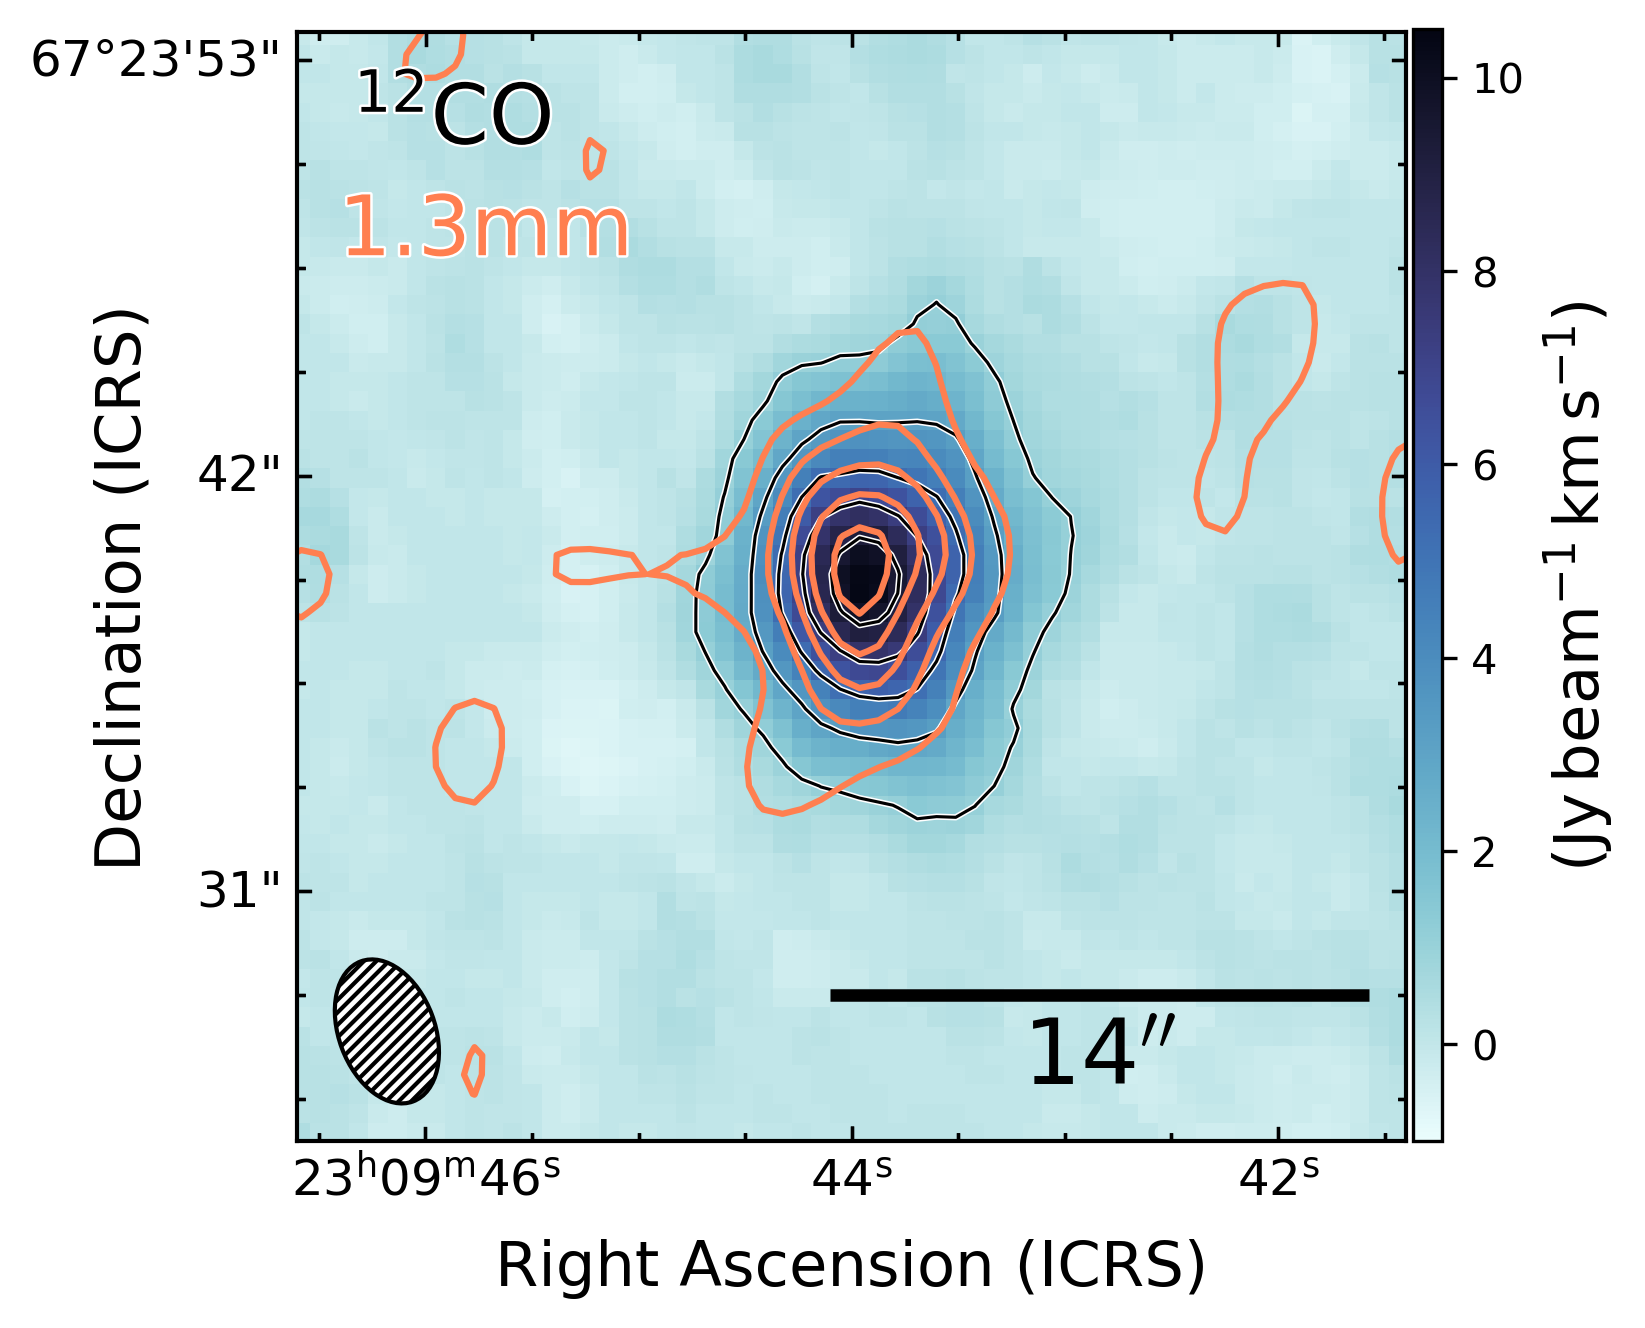

In [111]:
import cmocean

color_table=cmocean.cm.ice_r
#olor_table=cmasher.cm.ocean

fig = plt.figure(dpi=300)

f_12CO = aplpy.FITSFigure(mom0_12CO, figure=fig, dimensions=[0,1], slices=[1])

f_12CO.show_colorscale(cmap=color_table, vmin=-1000, vmax=10500)#, vmin=vmin, vmax=vmax) 

# 12CO
rms_em = 1.7e2 # Jy/beam m/s from mom0 map
max_em = 1.04e4 # Jy/beam m/s from mom0 map
#c_levs = np.array([3,6,12,24])*rms_em
c_levs = np.arange(0.1,1.2,0.2)*max_em

f_12CO.show_contour(colors='white', linewidths=1.5, levels=c_levs)
f_12CO.show_contour(colors='black', linewidths=0.75, levels=c_levs)

# dust continuum
rms_em = 7.86e-4 # Jy/beam
max_em = 1.59e-2 # Jy/beam
#c_levs = np.array([3,6,12,24])*rms_em
c_levs = np.arange(0.1,1.2,0.2)*max_em

# adopt the default layout
figure_layout( f_12CO, c_unit='', colorbar=False, fontcolor='black', scale=14.)

#f_12CO.show_contour(cont, colors='white', linewidths=2.5, levels=c_levs)
f_12CO.show_contour(cont, colors='coral', linewidths=1.5, levels=c_levs)

f_12CO.add_label(0.14,0.92, '$^{12}$CO', relative=True, color='black', size=20, path_effects=[pe.withStroke(linewidth=1.2, foreground="white")])
f_12CO.add_label(0.17,0.82, '1.3mm', relative=True, color='coral', size=20, path_effects=[pe.withStroke(linewidth=1.2, foreground="white")])

#f_12CO.add_label(0.40,0.92, '$^{12}$CO $(2-1)$', relative=True, color='white', size=18, path_effects=[pe.withStroke(linewidth=1.5, foreground="black")])

#f_12CO.axis_labels.set_xtext(' ')
#f_12CO.axis_labels.set_ytext(' ')

#f_12CO.set_title('', size=20)

im = plt.imshow(mom0_12CO[0].data/1000, cmap=color_table, vmin=-1000/1000, vmax=10500/1000)
cb_ax = fig.add_axes([0.805, 0.11, 0.015, 0.772]) #right, top, thickness, length
cbar = fig.colorbar(im, cax=cb_ax)
cbar.set_label('$(\mathrm{Jy\,beam^{-1}\,km\,s^{-1}})$', fontsize=15, color='black')


fig.savefig('../plots/paper_plots/DraChi_12CO_with_cont_contours.pdf', bbox_inches='tight')

INFO: Setting slices=[0, 0] [aplpy.core]


Set OBSGEO-B to    19.947177 from OBSGEO-[XYZ].
Set OBSGEO-H to     6578.484 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


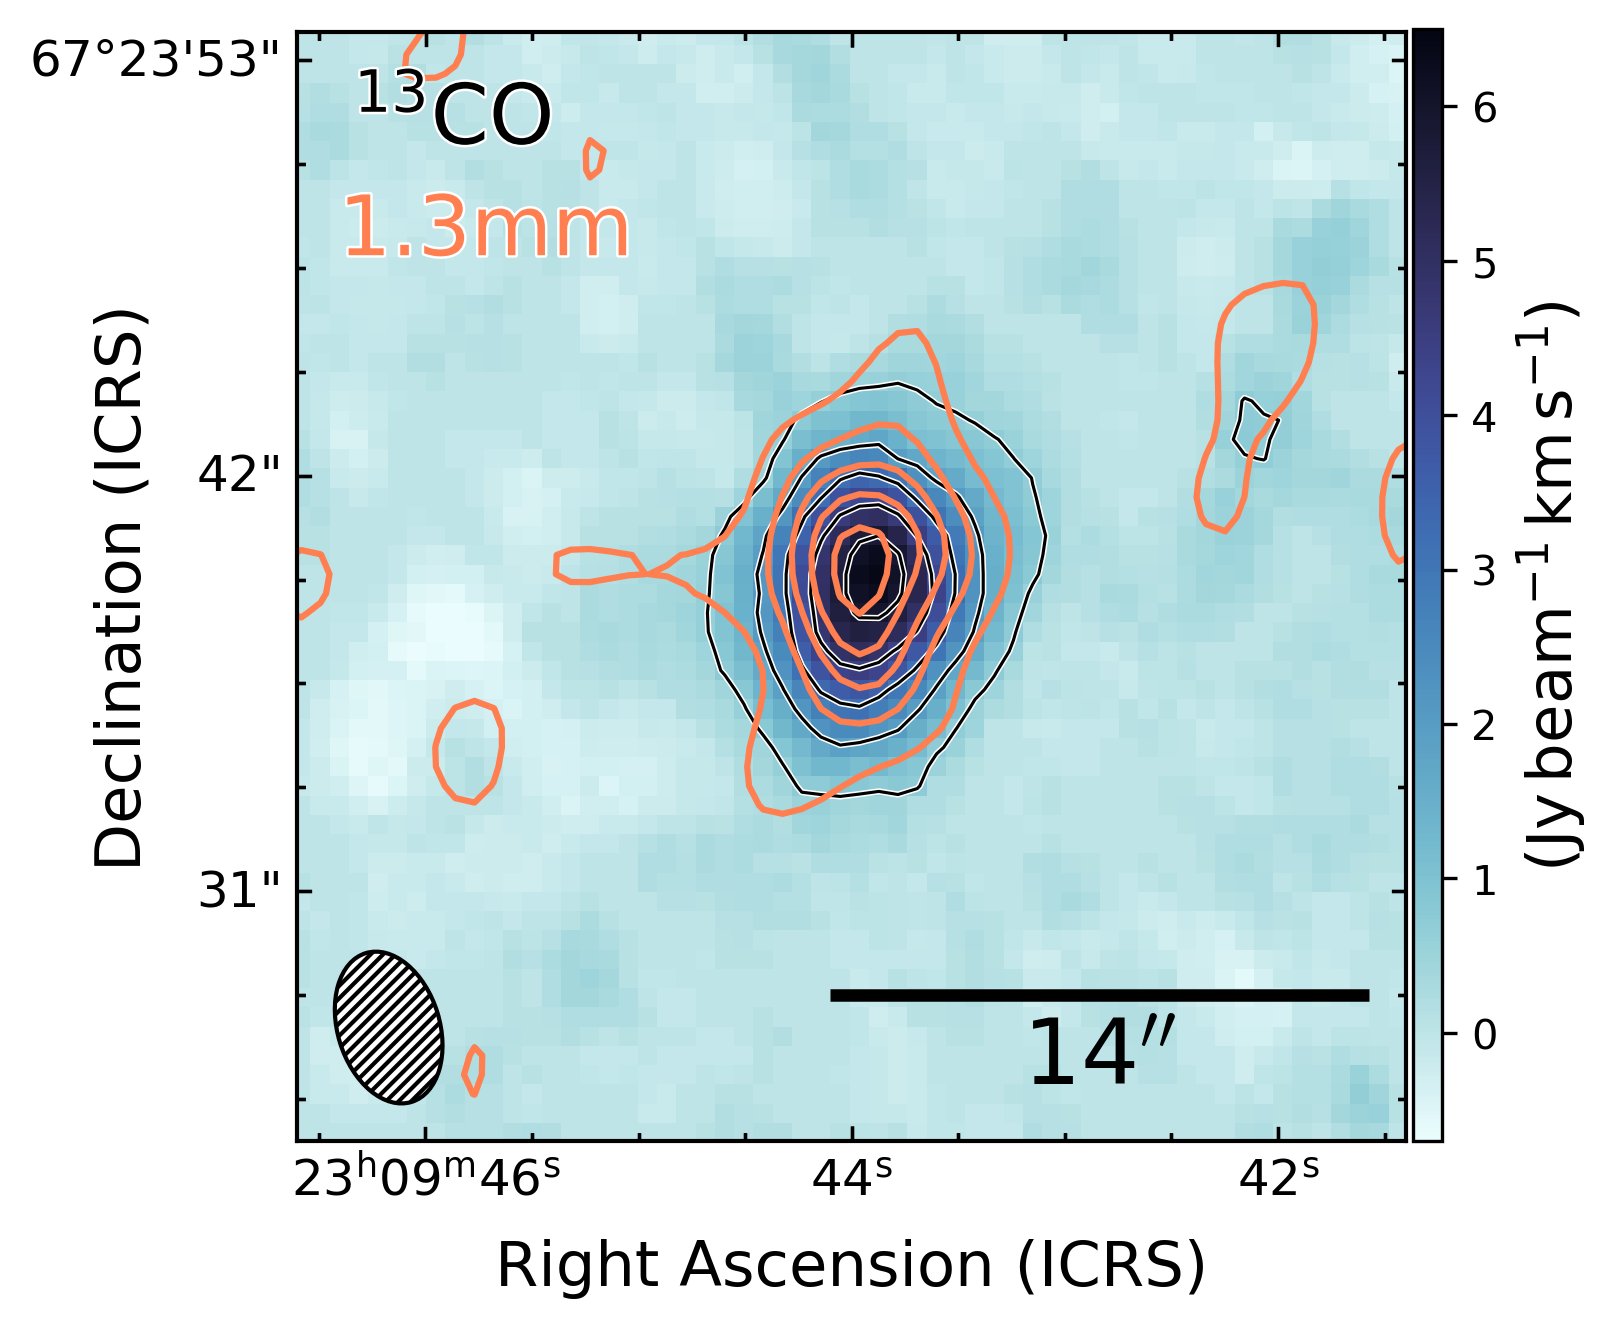

In [113]:
import cmocean

color_table=cmocean.cm.ice_r
#olor_table=cmasher.cm.ocean

fig = plt.figure(dpi=300)

f_13CO = aplpy.FITSFigure(mom0_13CO, figure=fig, dimensions=[0,1], slices=[1])

f_13CO.show_colorscale(cmap=color_table, vmin=-1000, vmax=10500)#, vmin=vmin, vmax=vmax) 

# 13CO
rms_em = 1.26e2 # Jy/beam m/s; value taken from CASAviewer
max_em = 6.47e3 # mJy/beam m/s from mom0 map
#c_levs = np.array([3,6,12,24])*rms_em
c_levs = np.arange(0.1,1.2,0.2)*max_em

f_13CO.show_contour(colors='white', linewidths=1.5, levels=c_levs)
f_13CO.show_contour(colors='black', linewidths=0.75, levels=c_levs)

# dust continuum
rms_em = 7.86e-4 # Jy/beam
max_em = 1.59e-2 # Jy/beam
#c_levs = np.array([3,6,12,24])*rms_em
c_levs = np.arange(0.1,1.2,0.2)*max_em

# adopt the default layout
figure_layout( f_13CO, c_unit='', colorbar=False, fontcolor='black', scale=14.)

#f_13CO.show_contour(cont, colors='white', linewidths=2.5, levels=c_levs)
f_13CO.show_contour(cont, colors='coral', linewidths=1.5, levels=c_levs)

f_13CO.add_label(0.14,0.92, '$^{13}$CO', relative=True, color='black', size=20, path_effects=[pe.withStroke(linewidth=1.2, foreground="white")])
f_13CO.add_label(0.17,0.82, '1.3mm', relative=True, color='coral', size=20, path_effects=[pe.withStroke(linewidth=1.2, foreground="white")])

#f_13CO.add_label(0.40,0.92, '$^{12}$CO $(2-1)$', relative=True, color='white', size=18, path_effects=[pe.withStroke(linewidth=1.5, foreground="black")])

#f_13CO.axis_labels.set_xtext(' ')
#f_13CO.axis_labels.set_ytext(' ')

#f_13CO.set_title('', size=20)

im = plt.imshow(mom0_13CO[0].data/1000, cmap=color_table, vmin=-700/1000, vmax=6500/1000)
cb_ax = fig.add_axes([0.805, 0.11, 0.015, 0.772]) #right, top, thickness, length
cbar = fig.colorbar(im, cax=cb_ax)
cbar.set_label('$(\mathrm{Jy\,beam^{-1}\,km\,s^{-1}})$', fontsize=15, color='black')


fig.savefig('../plots/paper_plots/DraChi_13CO_with_cont_contours.pdf', bbox_inches='tight')

INFO: Setting slices=[0, 0] [aplpy.core]


Set OBSGEO-B to    19.947177 from OBSGEO-[XYZ].
Set OBSGEO-H to     6578.484 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


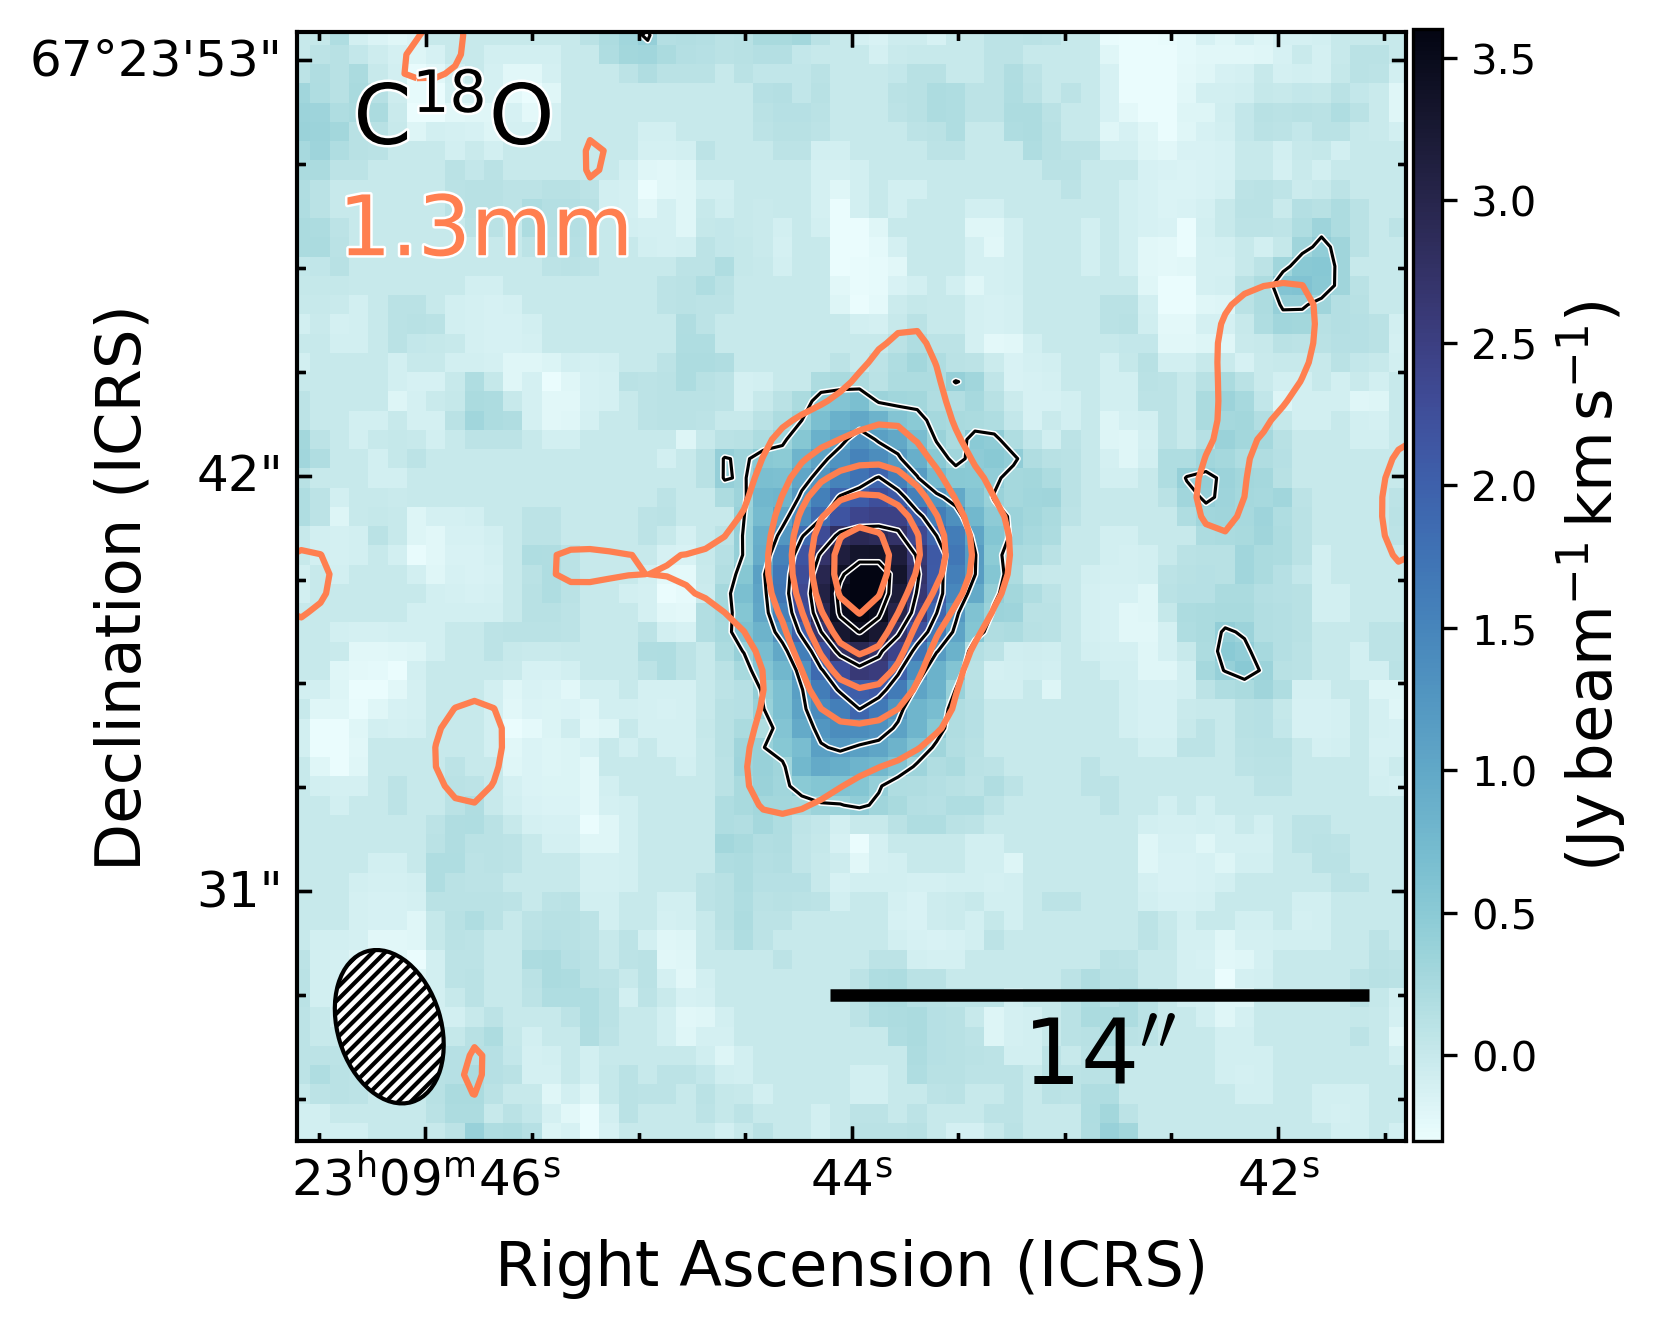

In [115]:
import cmocean

color_table=cmocean.cm.ice_r
#olor_table=cmasher.cm.ocean

fig = plt.figure(dpi=300)

f_C18O = aplpy.FITSFigure(mom0_C18O, figure=fig, dimensions=[0,1], slices=[1])

f_C18O.show_colorscale(cmap=color_table, vmin=-1000, vmax=10500)#, vmin=vmin, vmax=vmax) 

# C18O
rms_em = 1.02e2 # Jy/beam m/s; value taken from CASAviewer
max_em = 3.81e3 # Jy/beam m/s; value taken from CASAviewer
#c_levs = np.array([3,6,12,24])*rms_em
c_levs = np.arange(0.1,1.2,0.2)*max_em

f_C18O.show_contour(colors='white', linewidths=1.5, levels=c_levs)
f_C18O.show_contour(colors='black', linewidths=0.75, levels=c_levs)

# dust continuum
rms_em = 7.86e-4 # Jy/beam
max_em = 1.59e-2 # Jy/beam
#c_levs = np.array([3,6,12,24])*rms_em
c_levs = np.arange(0.1,1.2,0.2)*max_em

# adopt the default layout
figure_layout( f_C18O, c_unit='', colorbar=False, fontcolor='black', scale=14.)

#f_C18O.show_contour(cont, colors='white', linewidths=2.5, levels=c_levs)
f_C18O.show_contour(cont, colors='coral', linewidths=1.5, levels=c_levs)

f_C18O.add_label(0.14,0.92, 'C$^{18}$O', relative=True, color='black', size=20, path_effects=[pe.withStroke(linewidth=1.2, foreground="white")])
f_C18O.add_label(0.17,0.82, '1.3mm', relative=True, color='coral', size=20, path_effects=[pe.withStroke(linewidth=1.2, foreground="white")])

#f_C18O.add_label(0.40,0.92, '$^{12}$CO $(2-1)$', relative=True, color='white', size=18, path_effects=[pe.withStroke(linewidth=1.5, foreground="black")])

#f_C18O.axis_labels.set_xtext(' ')
#f_C18O.axis_labels.set_ytext(' ')

#f_C18O.set_title('', size=20)

im = plt.imshow(mom0_C18O[0].data/1000, cmap=color_table, vmin=-300/1000, vmax=3600/1000)
cb_ax = fig.add_axes([0.805, 0.11, 0.015, 0.772]) #right, top, thickness, length
cbar = fig.colorbar(im, cax=cb_ax)
cbar.set_label('$(\mathrm{Jy\,beam^{-1}\,km\,s^{-1}})$', fontsize=15, color='black')


fig.savefig('../plots/paper_plots/DraChi_C18O_with_cont_contours.pdf', bbox_inches='tight')

### Moment 1 maps

In [5]:
def figure_layout_mom1( fig, c_unit, fontcolor='white', colorbar=True, recenter=True, boxsize=0.01):
    fig.set_nan_color('0.95')
    
    # beam 
    fig.add_beam()
    fig.beam.set(facecolor='white', edgecolor='black', hatch='////////')
    
    # 
    fig.axis_labels.set_font(size=15)
    fig.axis_labels.set_xtext('Right Ascension (ICRS)')
    fig.axis_labels.set_ytext('Declination (ICRS)')
    fig.axis_labels.set_ypad(pad=-1.5)
    #fig.tick_labels.set_yformat('d.ddd')
    #fig.tick_labels.set_xformat('d.ddd')

    ## Scale bar
    ang_sep = (14*u.arcsec).to(u.rad)
    fig.add_scalebar(ang_sep)
    fig.scalebar.set_label("$14''$")
    fig.scalebar.set_font(size=22)
    fig.scalebar.set_linewidth(3) 
    fig.scalebar.set_color(fontcolor)
    
    if colorbar:
        fig.add_colorbar()
        fig.colorbar.set_location('right')
        fig.colorbar.set_width(0.1)
        fig.colorbar.set_pad(0.05)
        fig.colorbar.set_axis_label_text(c_unit)
        fig.colorbar.set_label_properties(size=10)
    
    # Ticks
    fig.ticks.set_color(fontcolor)
    fig.ticks.set_tick_direction('in')
    fig.ticks.set_minor_frequency(4)
    fig.ticks.set_xspacing(0.007)  # degrees
    fig.ticks.set_yspacing(0.002)  # degrees
    fig.tick_labels.set_font(size=12)
    
    if recenter:
        # got the coordinates of the center from CASAviewer
        fig.recenter(347.432,67.3942,width=boxsize,height=boxsize)
    

In [6]:
mom1_12CO = fits.open('/Users/kristina/Hamburgers/Draculas_Chivito/SMA/data/DraChi.briggs0.12CO.LSRK.im.image_v0.fits')
mom1_13CO = fits.open('/Users/kristina/Hamburgers/Draculas_Chivito/SMA/data/DraChi.briggs0.13CO.velcor.lsrk.im.image_v0.fits')
mom1_C18O = fits.open('/Users/kristina/Hamburgers/Draculas_Chivito/SMA/data/DraChi.briggs0.C18O.velcor.lsrk.im.image_v0.fits')

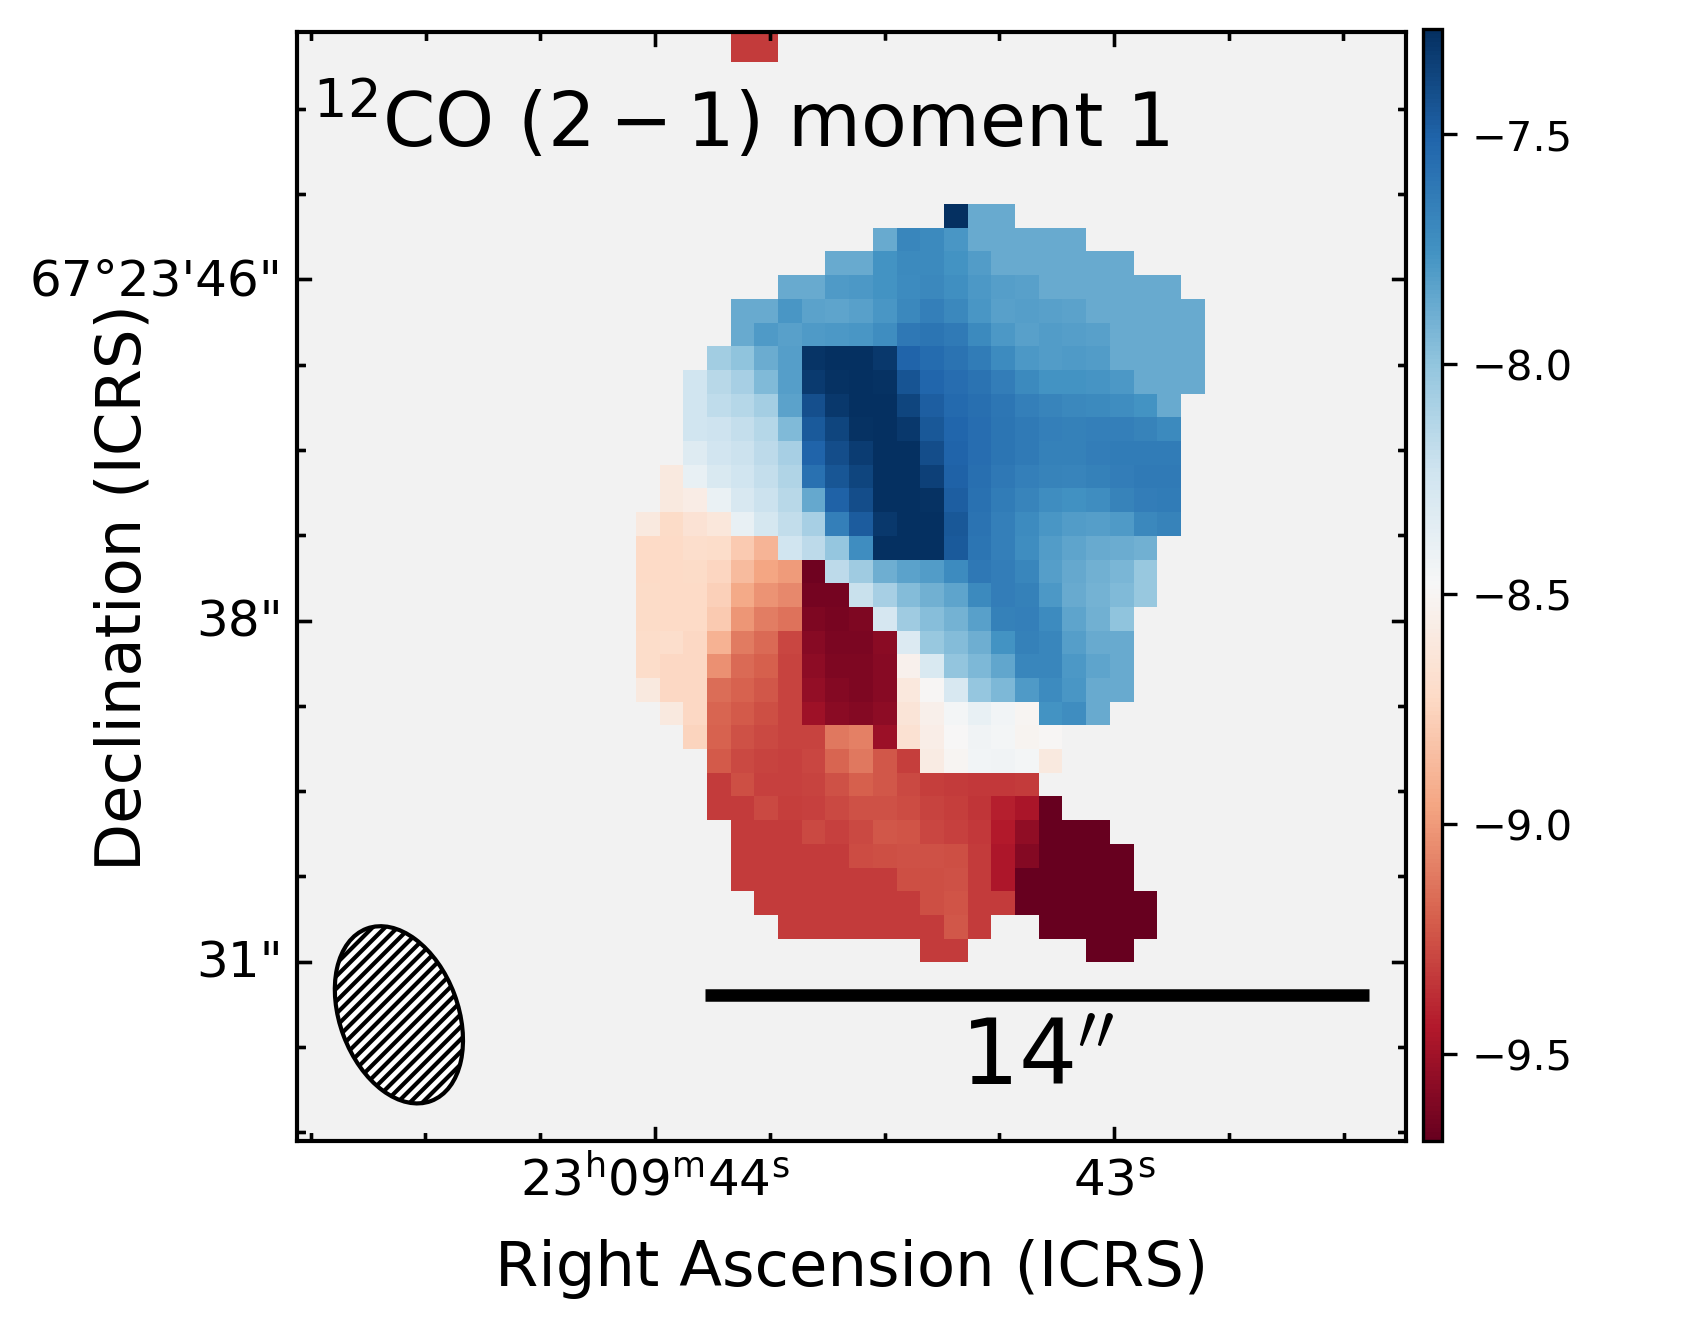

In [7]:
color_table='RdBu'

fig = plt.figure(dpi=300)

f_12CO = aplpy.FITSFigure(mom1_12CO, figure=fig, dimensions=[0,1], slices=[1])

vmin, vmax = np.nanpercentile(mom1_12CO[0].data, [2, 98])
f_12CO.show_colorscale(cmap=color_table, vmin=vmin, vmax=vmax) 

max_em = 1.04e4 # Jy/beam m/s from mom0 map
c_levs = np.arange(0.1,1.2,0.2)*max_em

# adopt the default layout
figure_layout_mom1( f_12CO, c_unit='', colorbar=False, fontcolor='black', boxsize=0.0065)

#f_12CO.show_contour(colors='white', linewidths=1.5, levels=c_levs)
#f_12CO.show_contour(colors='black', linewidths=0.75, levels=c_levs)

f_12CO.add_label(0.40,0.92, '$^{12}$CO $(2-1)$ moment 1', relative=True, color='black', size=18)#, path_effects=[pe.withStroke(linewidth=1.5, foreground="white")])

#f_12CO.axis_labels.set_xtext(' ')
#f_12CO.axis_labels.set_ytext(' ')

#f_12CO.set_title('SMA', size=20)

im = plt.imshow(mom1_12CO[0].data/1000, cmap=color_table, vmin=vmin/1000, vmax=vmax/1000)
cb_ax = fig.add_axes([0.81, 0.11, 0.01, 0.772]) #right, top, thickness, length
cbar = fig.colorbar(im, cax=cb_ax)
cbar.set_label('$(\mathrm{km\,s^{-1}})$', fontsize=15, color='white')


fig.savefig('../plots/paper_plots/DraChi_12CO_mom1.pdf', bbox_inches='tight')

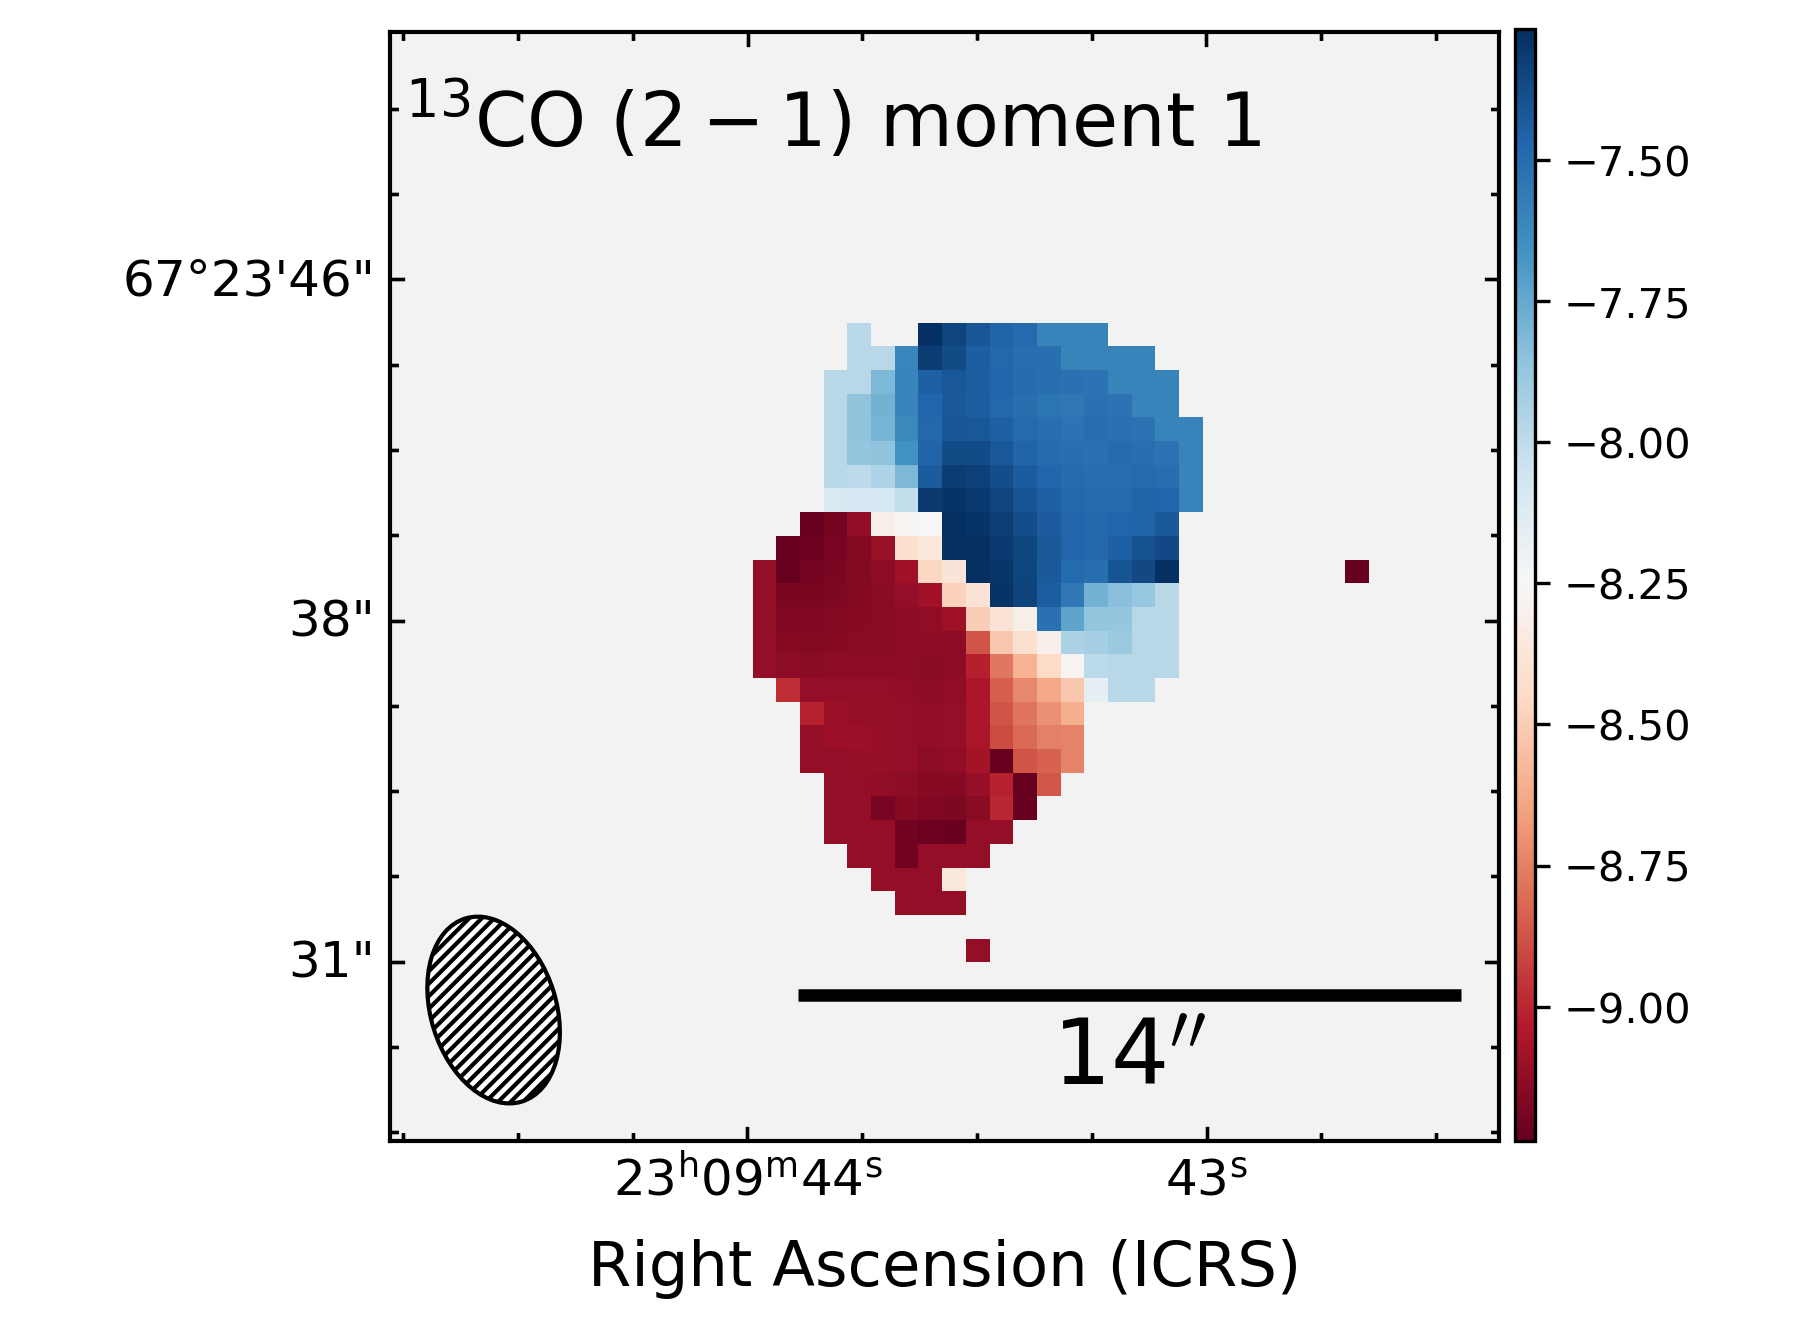

In [8]:
color_table='RdBu'

fig = plt.figure(dpi=300)

f_13CO = aplpy.FITSFigure(mom1_13CO, figure=fig, dimensions=[0,1], slices=[1])

vmin, vmax = np.nanpercentile(mom1_13CO[0].data, [2, 98])
f_13CO.show_colorscale(cmap=color_table, vmin=vmin, vmax=vmax) 

max_em = 1.04e4 # Jy/beam m/s from mom0 map
c_levs = np.arange(0.1,1.2,0.2)*max_em

# adopt the default layout
figure_layout_mom1( f_13CO, c_unit='', colorbar=False, fontcolor='black', boxsize=0.0065)

#f_13CO.show_contour(colors='white', linewidths=1.5, levels=c_levs)
#f_13CO.show_contour(colors='black', linewidths=0.75, levels=c_levs)

f_13CO.add_label(0.40,0.92, '$^{13}$CO $(2-1)$ moment 1', relative=True, color='black', size=18)#, path_effects=[pe.withStroke(linewidth=1.5, foreground="white")])

#f_13CO.axis_labels.set_xtext(' ')
f_13CO.axis_labels.set_ytext(' ')

#f_13CO.set_title('SMA', size=20)

im = plt.imshow(mom1_13CO[0].data/1000, cmap=color_table, vmin=vmin/1000, vmax=vmax/1000)
cb_ax = fig.add_axes([0.81, 0.11, 0.01, 0.772]) #right, top, thickness, length
cbar = fig.colorbar(im, cax=cb_ax)
cbar.set_label('$(\mathrm{km\,s^{-1}})$', fontsize=15, color='white')


fig.savefig('../plots/paper_plots/DraChi_13CO_mom1.pdf', bbox_inches='tight')

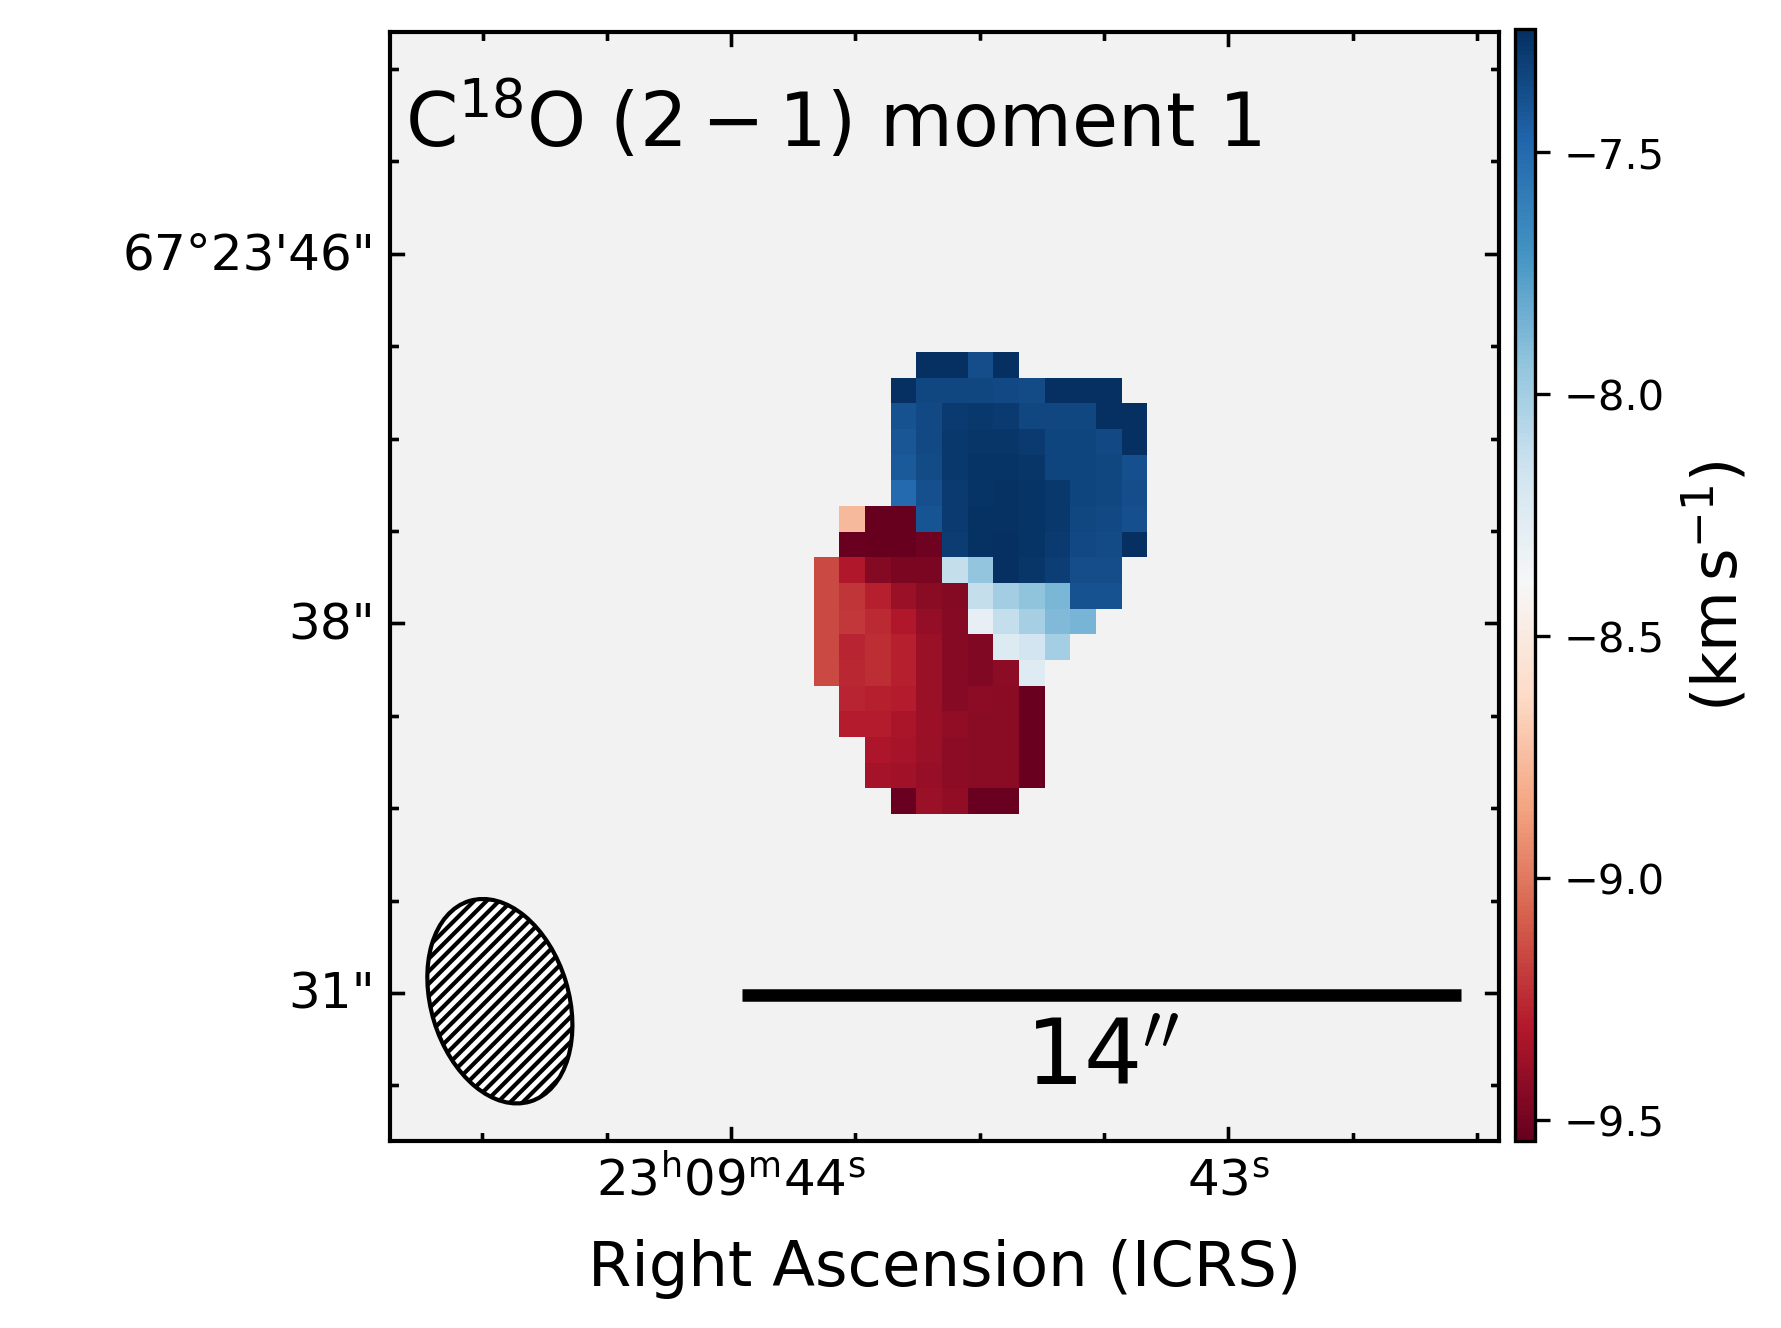

In [9]:
color_table='RdBu'

fig = plt.figure(dpi=300)

f_C18O = aplpy.FITSFigure(mom1_C18O, figure=fig, dimensions=[0,1], slices=[1])

vmin, vmax = np.nanpercentile(mom1_C18O[0].data, [2, 98])
f_C18O.show_colorscale(cmap=color_table, vmin=vmin, vmax=vmax) 

max_em = 1.04e4 # Jy/beam m/s from mom0 map
c_levs = np.arange(0.1,1.2,0.2)*max_em

# adopt the default layout
figure_layout_mom1( f_C18O, c_unit='', colorbar=False, fontcolor='black', boxsize=0.006)

#f_C18O.show_contour(colors='white', linewidths=1.5, levels=c_levs)
#f_C18O.show_contour(colors='black', linewidths=0.75, levels=c_levs)

f_C18O.add_label(0.40,0.92, 'C$^{18}$O $(2-1)$ moment 1', relative=True, color='black', size=18)#, path_effects=[pe.withStroke(linewidth=1.5, foreground="white")])

#f_C18O.axis_labels.set_xtext(' ')
f_C18O.axis_labels.set_ytext(' ')

#f_C18O.set_title('SMA', size=20)

im = plt.imshow(mom1_C18O[0].data/1000, cmap=color_table, vmin=vmin/1000, vmax=vmax/1000)
cb_ax = fig.add_axes([0.81, 0.11, 0.01, 0.772]) #right, top, thickness, length
cbar = fig.colorbar(im, cax=cb_ax)
cbar.set_label('$(\mathrm{km\,s^{-1}})$', fontsize=15, color='black')


fig.savefig('../plots/paper_plots/DraChi_C18O_mom1.pdf', bbox_inches='tight')

# PV diagrams

In [26]:
from astropy import wcs
from astropy.wcs import WCS
from matplotlib.gridspec import GridSpec

In [28]:
pv_12CO = fits.open('./PV_diagram_12CO.fits')

# get pixel scales
pos_zero_12CO = pv_12CO[0].header['CRVAL1'] # 0 deg
vel_zero_12CO = pv_12CO[0].header['CRVAL2']/1000. #5.2016146231858 km/s

pos_pixscale_12CO = pv_12CO[0].header['CDELT1']*60.*60. # arcsec per pixel
vel_pixscale_12CO = pv_12CO[0].header['CDELT2']/1000. #-0.36319867699999997 km/s per pixel

pos_offset_12CO = pos_zero_12CO/pos_pixscale_12CO
vel_offseto_12CO = vel_zero_12CO/vel_pixscale_12CO


pv_13CO = fits.open('./PV_diagram_13CO.fits')

# get pixel scales
pos_zero_13CO = pv_13CO[0].header['CRVAL1'] # 0 deg
vel_zero_13CO = pv_13CO[0].header['CRVAL2']/1000. #5.2016146231858 km/s

pos_pixscale_13CO = pv_13CO[0].header['CDELT1']*60.*60. # arcsec per pixel
vel_pixscale_13CO = pv_13CO[0].header['CDELT2']/1000. #-0.36319867699999997 km/s per pixel

pos_offset_13CO = pos_zero_13CO/pos_pixscale_13CO
vel_offseto_13CO = vel_zero_13CO/vel_pixscale_13CO


pv_C18O = fits.open('./PV_diagram_C18O.fits')

# get pixel scales
pos_zero_C18O = pv_C18O[0].header['CRVAL1'] # 0 deg
vel_zero_C18O = pv_C18O[0].header['CRVAL2']/1000. #5.2016146231858 km/s

pos_pixscale_C18O = pv_C18O[0].header['CDELT1']*60.*60. # arcsec per pixel
vel_pixscale_C18O = pv_C18O[0].header['CDELT2']/1000. #-0.36319867699999997 km/s per pixel

pos_offset_C18O = pos_zero_C18O/pos_pixscale_C18O
vel_offseto_C18O = vel_zero_C18O/vel_pixscale_C18O

len_slit = 22.*u.arcsec
width_slit = 6*u.arcsec
PA_slit = 342.*u.deg

/var/folders/y_/tlgj9dy14lnfchth7yq3v6f80000gn/T/ipykernel_33076/2851048681.py:4: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(wspace=0.05)


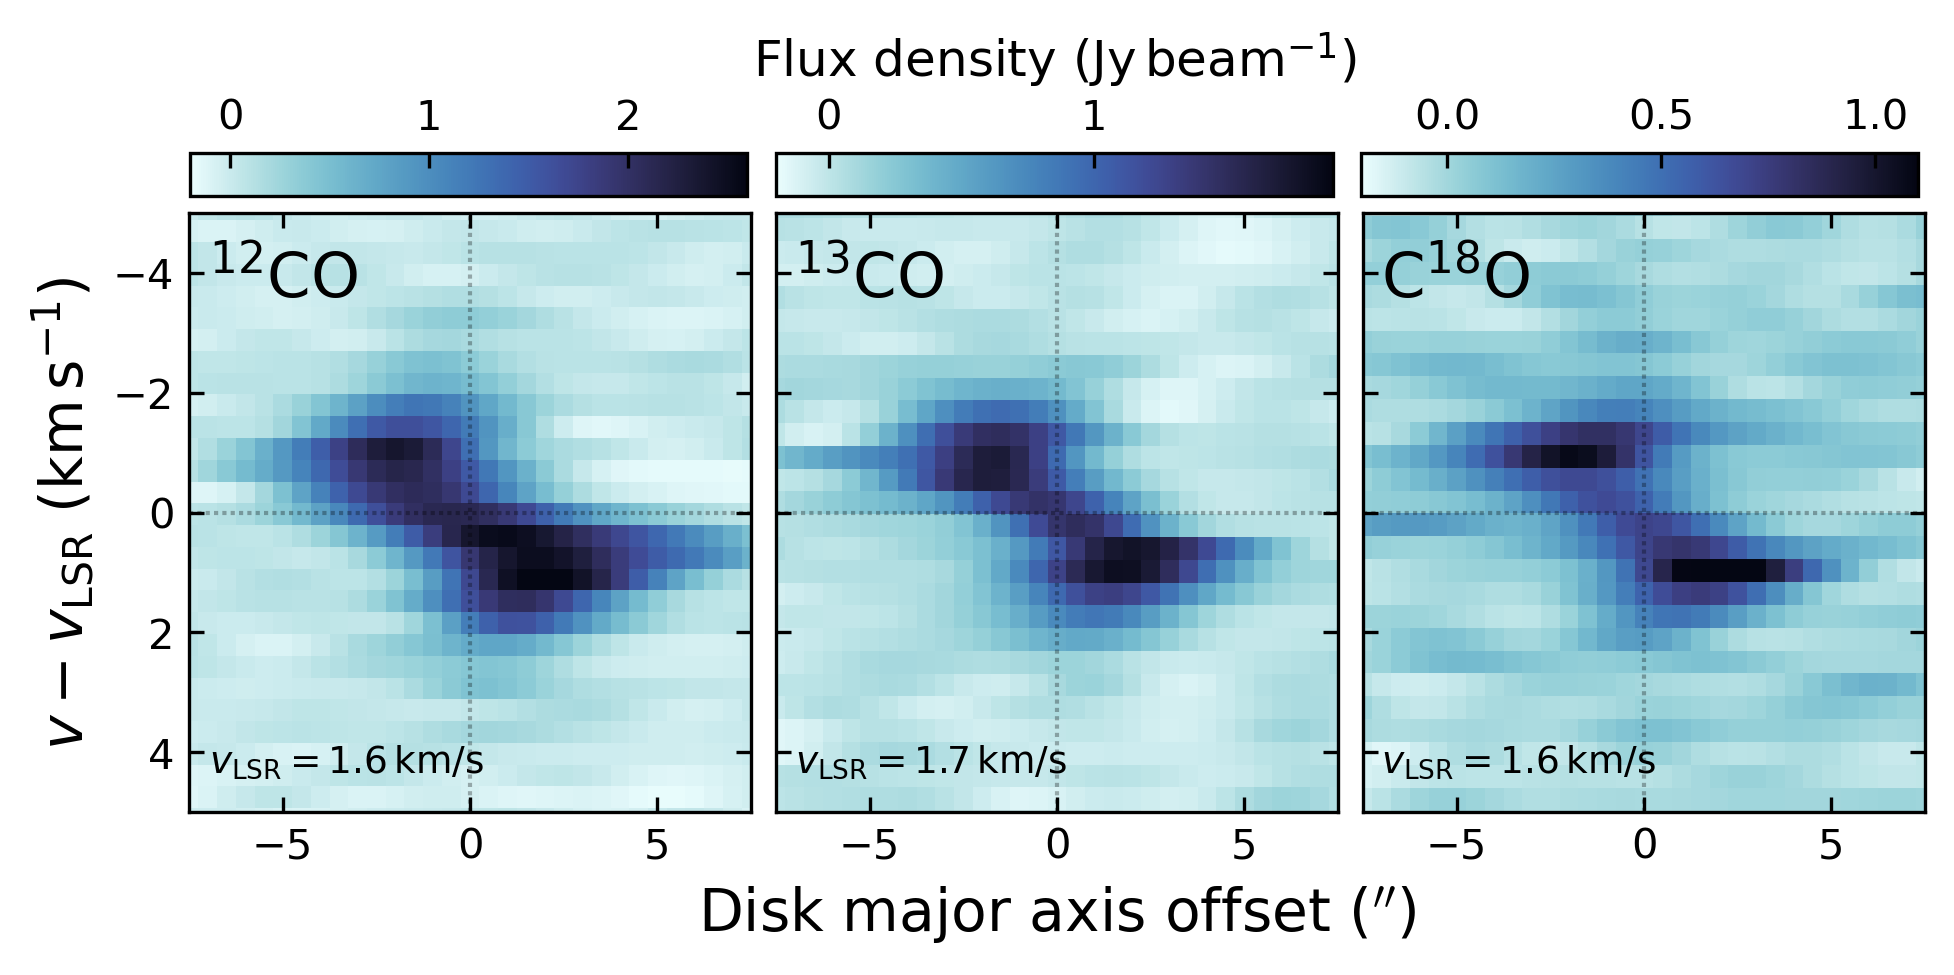

In [95]:
color_table=cmocean.cm.ice_r

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, layout="constrained", dpi=300)
fig.subplots_adjust(wspace=0.05)


vmin, vmax = -0.2, 2.6

### PV diagram
v_sys_12CO = 1.6 #u.km/u.s # got this value from eddy
pos_mid = len_slit.value/2. #arcsec; 

vel_arr = np.linspace(0,pv_12CO[0].shape[1]-1,pv_12CO[0].shape[1])*pos_pixscale_12CO + pos_zero_12CO - pos_mid 
pos_arr = np.linspace(0,pv_12CO[0].shape[0]-1,pv_12CO[0].shape[0])*vel_pixscale_12CO + vel_zero_12CO - v_sys_12CO


xi, yi = np.meshgrid(vel_arr, pos_arr)
zi = pv_12CO[0].data

im = ax1.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=color_table, linewidth=0,rasterized=True, vmin=vmin, vmax=vmax)

ax1.invert_yaxis()
ax1.set_xlabel("", fontsize=14)
ax1.set_ylabel(r"$v-v_\mathrm{LSR}$ (km$\,\mathrm{{s}}^{{-1}}$)", fontsize=14)
ax1.yaxis.set_label_position("left")

ax1.axvline(0, c='black', ls=(0, (1, 1)), lw=1.0, alpha=0.3)
ax1.axhline(0, c='black', ls=(0, (1, 1)), lw=1.0, alpha=0.3)

ax1.set_ylim(5,-5)
ax1.set_xlim(7.5, -7.5)

ax1.tick_params(axis='both', which='both', direction="in", left=True, right=True, top=True, bottom=True, color='black', labelsize=10)
ax1.set_aspect(1.6)
ax1.invert_xaxis()

fig.text(0.1,0.65, s='$^{12}$CO', c='black', size=15)
fig.text(0.1,0.32, s=r'$v_\mathrm{{LSR}}={0}\,\mathrm{{km/s}}$'.format(v_sys_12CO), c='black', size=9)
#fig.text(0.07,0.30, s=r'PA$=342^{{\circ}}$', c='black', size=9)

cb_ax = fig.add_axes([0.09, 0.72, 0.29, 0.03]) #right, top, length, thickness, 
cbar = fig.colorbar(im, cax=cb_ax, orientation='horizontal')
cbar.ax.tick_params(axis='x', direction='in')
cbar.ax.xaxis.set_ticks_position("top")
cbar.set_label('', fontsize=14, labelpad=-50)



###################################
vmin, vmax = -0.2, 1.9

### PV diagram
v_sys_13CO = 1.7 #u.km/u.s # got this value from eddy
pos_mid = len_slit.value/2. #arcsec; 

vel_arr = np.linspace(0,pv_13CO[0].shape[1]-1,pv_13CO[0].shape[1])*pos_pixscale_13CO + pos_zero_13CO - pos_mid 
pos_arr = np.linspace(0,pv_13CO[0].shape[0]-1,pv_13CO[0].shape[0])*vel_pixscale_13CO + vel_zero_13CO - v_sys_13CO

xi, yi = np.meshgrid(vel_arr, pos_arr)
zi = pv_13CO[0].data

im = ax2.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=color_table, linewidth=0,rasterized=True, vmin=vmin, vmax=vmax)

ax2.invert_yaxis()

ax2.set_xlabel("Disk major axis offset ($''$)", fontsize=14)
#ax2.set_ylabel(r"$v-v_\mathrm{cent}$ (km$\,\mathrm{{s}}^{{-1}}$)", fontsize=14)
ax2.set_yticklabels([])

ax2.axvline(0, c='black', ls=(0, (1, 1)), lw=1.0, alpha=0.3)
ax2.axhline(0, c='black', ls=(0, (1, 1)), lw=1.0, alpha=0.3)

ax2.set_ylim(5,-5)
ax2.set_xlim(7.5, -7.5)

ax2.yaxis.set_label_position("left")
ax2.tick_params(axis='both', which='both', direction="in", left=True, right=True, top=True, bottom=True, color='black', labelsize=10)

ax2.set_aspect(1.6)

ax2.invert_xaxis()

fig.text(0.405,0.65, s='$^{13}$CO', c='black', size=15)
fig.text(0.405,0.32, s=r'$v_\mathrm{{LSR}}={0}\,\mathrm{{km/s}}$'.format(v_sys_13CO), c='black', size=9)
#fig.text(0.07,0.30, s=r'PA$=342^{{\circ}}$', c='black', size=9)


cb_ax = fig.add_axes([0.395, 0.72, 0.29, 0.03]) #right, top, length, thickness, 
cbar = fig.colorbar(im, cax=cb_ax, orientation='horizontal')
cbar.ax.tick_params(axis='x', direction='in')
cbar.ax.xaxis.set_ticks_position("top")
cbar.set_label('Flux density $(\mathrm{Jy\,beam^{-1}})$', fontsize=12, labelpad=-40)



###################################
vmin, vmax = -0.2, 1.1

### PV diagram
v_sys_C18O = 1.6 #u.km/u.s # got this value from eddy
pos_mid = len_slit.value/2. #arcsec; 

vel_arr = np.linspace(0,pv_C18O[0].shape[1]-1,pv_C18O[0].shape[1])*pos_pixscale_C18O + pos_zero_C18O - pos_mid 
pos_arr = np.linspace(0,pv_C18O[0].shape[0]-1,pv_C18O[0].shape[0])*vel_pixscale_C18O + vel_zero_C18O - v_sys_C18O

xi, yi = np.meshgrid(vel_arr, pos_arr)
zi = pv_C18O[0].data

im = ax3.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=color_table, linewidth=0,rasterized=True, vmin=vmin, vmax=vmax)

ax3.invert_yaxis()

ax3.set_xlabel("", fontsize=14)
#ax3.set_ylabel(r"$v-v_\mathrm{cent}$ (km$\,\mathrm{{s}}^{{-1}}$)", fontsize=14)
ax3.set_yticklabels([])

ax3.axvline(0, c='black', ls=(0, (1, 1)), lw=1.0, alpha=0.3)
ax3.axhline(0, c='black', ls=(0, (1, 1)), lw=1.0, alpha=0.3)

ax3.set_ylim(5,-5)
ax3.set_xlim(7.5, -7.5)

ax3.yaxis.set_label_position("left")
ax3.tick_params(axis='both', which='both', direction="in", left=True, right=True, top=True, bottom=True, color='black', labelsize=10)
ax3.set_aspect(1.6)
ax3.invert_xaxis()
fig.text(0.71,0.65, s='C$^{18}$O', c='black', size=15)
fig.text(0.71,0.32, s=r'$v_\mathrm{{LSR}}={0}\,\mathrm{{km/s}}$'.format(v_sys_C18O), c='black', size=9)
#fig.text(0.07,0.30, s=r'PA$=342^{{\circ}}$', c='black', size=9)

cb_ax = fig.add_axes([0.70, 0.72, 0.29, 0.03]) #right, top, length, thickness, 
cbar = fig.colorbar(im, cax=cb_ax, orientation='horizontal')
cbar.ax.tick_params(axis='x', direction='in')
cbar.ax.xaxis.set_ticks_position("top")
#cbar.set_label('Flux density $(\mathrm{Jy\,beam^{-1}})$', fontsize=12, labelpad=-40)


fig.savefig('../plots/paper_plots/pv_diagrams_all.pdf', bbox_inches='tight')


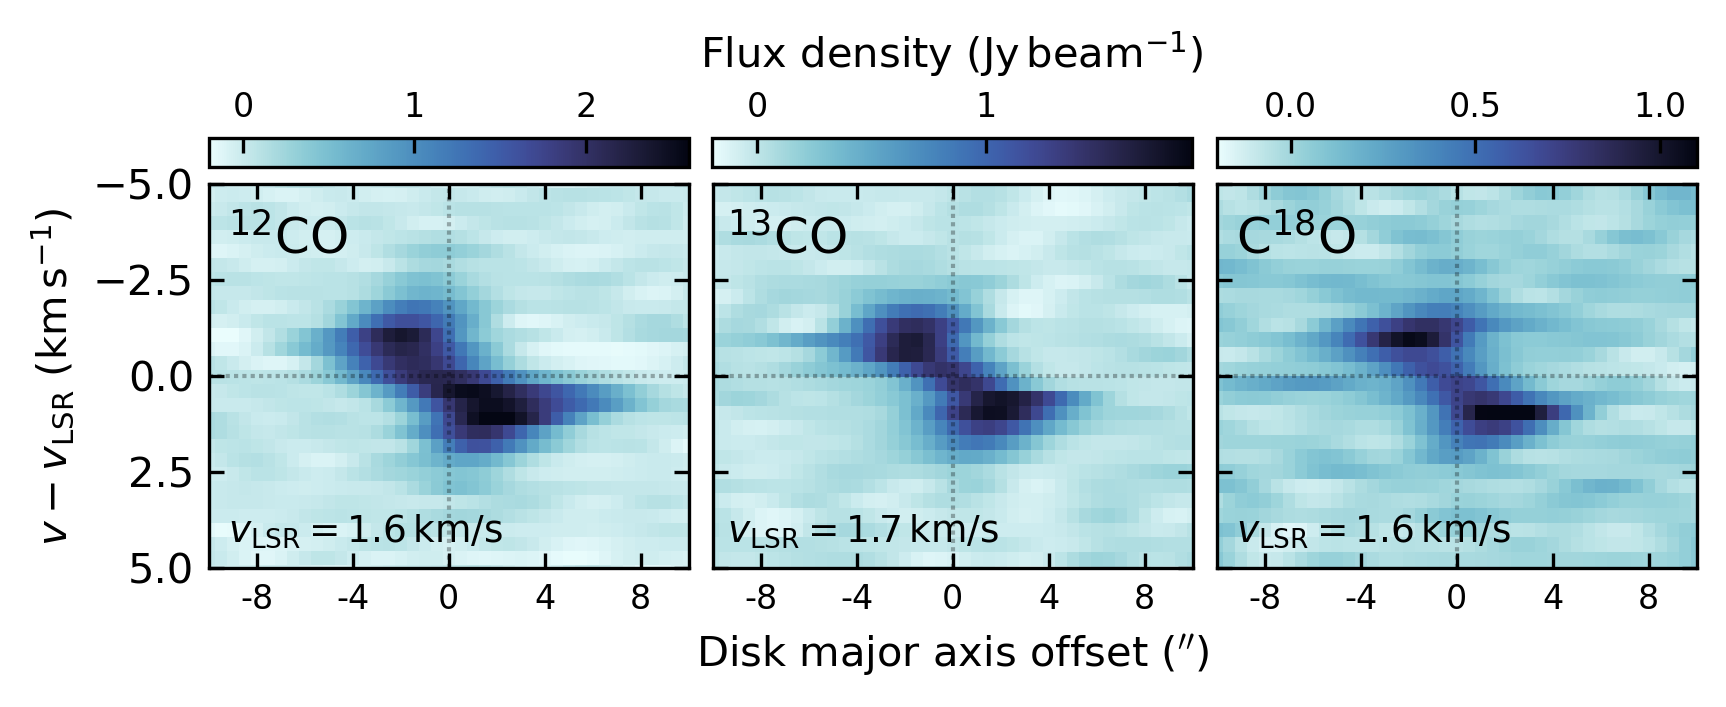

In [100]:
color_table=cmocean.cm.ice_r

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, dpi=300)
fig.subplots_adjust(wspace=0.05)


vmin, vmax = -0.2, 2.6

### PV diagram
v_sys_12CO = 1.6 #u.km/u.s # got this value from eddy
pos_mid = len_slit.value/2. #arcsec; 

vel_arr = np.linspace(0,pv_12CO[0].shape[1]-1,pv_12CO[0].shape[1])*pos_pixscale_12CO + pos_zero_12CO - pos_mid 
pos_arr = np.linspace(0,pv_12CO[0].shape[0]-1,pv_12CO[0].shape[0])*vel_pixscale_12CO + vel_zero_12CO - v_sys_12CO


xi, yi = np.meshgrid(vel_arr, pos_arr)
zi = pv_12CO[0].data

im = ax1.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=color_table, linewidth=0,rasterized=True, vmin=vmin, vmax=vmax)

ax1.invert_yaxis()
ax1.set_xlabel("", fontsize=12)
ax1.set_ylabel(r"$v-v_\mathrm{LSR}$ (km$\,\mathrm{{s}}^{{-1}}$)", fontsize=10)
ax1.yaxis.set_label_position("left")

ax1.axvline(0, c='black', ls=(0, (1, 1)), lw=1.0, alpha=0.3)
ax1.axhline(0, c='black', ls=(0, (1, 1)), lw=1.0, alpha=0.3)

ax1.set_ylim(5,-5)
ax1.set_xlim(10,-10)

ax1.tick_params(axis='both', which='both', direction="in", left=True, right=True, top=True, bottom=True, color='black')
ax1.set_xticks(np.arange(-8,12,4), labels=np.arange(-8,12,4), fontsize=8)
ax1.set_aspect(1.6)
ax1.invert_xaxis()

fig.text(0.135,0.58, s='$^{12}$CO', c='black', size=12)
fig.text(0.135,0.38, s=r'$v_\mathrm{{LSR}}={0}\,\mathrm{{km/s}}$'.format(v_sys_12CO), c='black', size=9)


#fig.text(0.07,0.30, s=r'PA$=342^{{\circ}}$', c='black', size=9)

cb_ax = fig.add_axes([0.125, 0.64, 0.25, 0.02]) #right, top, length, thickness, 
cbar = fig.colorbar(im, cax=cb_ax, orientation='horizontal')
cbar.ax.tick_params(axis='x', direction='in', labelsize=8)
cbar.ax.xaxis.set_ticks_position("top")
cbar.set_label('', fontsize=14, labelpad=-50)



###################################
vmin, vmax = -0.2, 1.9

### PV diagram
v_sys_13CO = 1.7 #u.km/u.s # got this value from eddy
pos_mid = len_slit.value/2. #arcsec; 

vel_arr = np.linspace(0,pv_13CO[0].shape[1]-1,pv_13CO[0].shape[1])*pos_pixscale_13CO + pos_zero_13CO - pos_mid 
pos_arr = np.linspace(0,pv_13CO[0].shape[0]-1,pv_13CO[0].shape[0])*vel_pixscale_13CO + vel_zero_13CO - v_sys_13CO

xi, yi = np.meshgrid(vel_arr, pos_arr)
zi = pv_13CO[0].data

im = ax2.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=color_table, linewidth=0,rasterized=True, vmin=vmin, vmax=vmax)

ax2.invert_yaxis()

ax2.set_xlabel("Disk major axis offset ($''$)", fontsize=10)
#ax2.set_ylabel(r"$v-v_\mathrm{cent}$ (km$\,\mathrm{{s}}^{{-1}}$)", fontsize=14)
ax2.set_yticklabels([])

ax2.axvline(0, c='black', ls=(0, (1, 1)), lw=1.0, alpha=0.3)
ax2.axhline(0, c='black', ls=(0, (1, 1)), lw=1.0, alpha=0.3)

ax2.set_ylim(5,-5)
ax2.set_xlim(10,-10)

ax2.yaxis.set_label_position("left")
ax2.tick_params(axis='both', which='both', direction="in", left=True, right=True, top=True, bottom=True, color='black')
ax2.set_xticks(np.arange(-8,12,4), labels=np.arange(-8,12,4), fontsize=8)

ax2.set_aspect(1.6)

ax2.invert_xaxis()

fig.text(0.395,0.58, s='$^{13}$CO', c='black', size=12)
fig.text(0.395,0.38, s=r'$v_\mathrm{{LSR}}={0}\,\mathrm{{km/s}}$'.format(v_sys_13CO), c='black', size=9)
#fig.text(0.07,0.30, s=r'PA$=342^{{\circ}}$', c='black', size=9)


cb_ax = fig.add_axes([0.387, 0.64, 0.25, 0.02]) #right, top, length, thickness, 
cbar = fig.colorbar(im, cax=cb_ax, orientation='horizontal')
cbar.ax.tick_params(axis='x', direction='in', labelsize=8)
cbar.ax.xaxis.set_ticks_position("top")
cbar.set_label('Flux density $(\mathrm{Jy\,beam^{-1}})$', fontsize=10, labelpad=-33)



###################################
vmin, vmax = -0.2, 1.1

### PV diagram
v_sys_C18O = 1.6 #u.km/u.s # got this value from eddy
pos_mid = len_slit.value/2. #arcsec; 

vel_arr = np.linspace(0,pv_C18O[0].shape[1]-1,pv_C18O[0].shape[1])*pos_pixscale_C18O + pos_zero_C18O - pos_mid 
pos_arr = np.linspace(0,pv_C18O[0].shape[0]-1,pv_C18O[0].shape[0])*vel_pixscale_C18O + vel_zero_C18O - v_sys_C18O

xi, yi = np.meshgrid(vel_arr, pos_arr)
zi = pv_C18O[0].data

im = ax3.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=color_table, linewidth=0,rasterized=True, vmin=vmin, vmax=vmax)

ax3.invert_yaxis()

ax3.set_xlabel("", fontsize=14)
#ax3.set_ylabel(r"$v-v_\mathrm{cent}$ (km$\,\mathrm{{s}}^{{-1}}$)", fontsize=14)
ax3.set_yticklabels([])

ax3.axvline(0, c='black', ls=(0, (1, 1)), lw=1.0, alpha=0.3)
ax3.axhline(0, c='black', ls=(0, (1, 1)), lw=1.0, alpha=0.3)

ax3.set_ylim(5,-5)
ax3.set_xlim(10,-10)

ax3.yaxis.set_label_position("left")
ax3.tick_params(axis='both', which='both', direction="in", left=True, right=True, top=True, bottom=True, color='black')
ax3.set_xticks(np.arange(-8,12,4), labels=np.arange(-8,12,4), fontsize=8)

ax3.set_aspect(1.6)
ax3.invert_xaxis()
fig.text(0.66,0.58, s='C$^{18}$O', c='black', size=12)
fig.text(0.66,0.38, s=r'$v_\mathrm{{LSR}}={0}\,\mathrm{{km/s}}$'.format(v_sys_C18O), c='black', size=9)
#fig.text(0.07,0.30, s=r'PA$=342^{{\circ}}$', c='black', size=9)

cb_ax = fig.add_axes([0.65, 0.64, 0.25, 0.02]) #right, top, length, thickness, 
cbar = fig.colorbar(im, cax=cb_ax, orientation='horizontal')
cbar.ax.tick_params(axis='x', direction='in', labelsize=8)
cbar.ax.xaxis.set_ticks_position("top")
#cbar.set_label('Flux density $(\mathrm{Jy\,beam^{-1}})$', fontsize=12, labelpad=-40)


fig.savefig('../plots/paper_plots/pv_diagrams_all_2.pdf', bbox_inches='tight')
